In [11]:
import pyabf
import pyabf.filter
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import pandas as pd
import ruptures as rpt
from level_finder import find_events

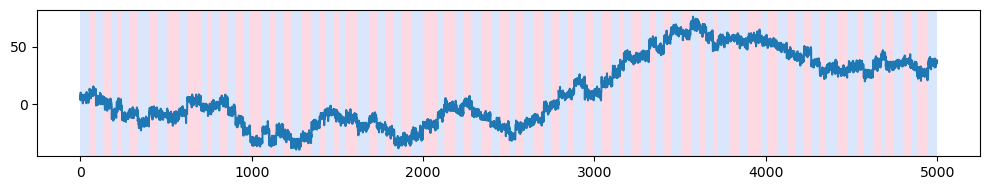

In [12]:
# 模拟数据
# creation of data
# n, dim = 5000, 1  # number of samples, dimension
# n_bkps, sigma = 100, 2.5  # number of change points, noise standart deviation
# signal, bkps = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)
# fig, ax_array = rpt.display(signal, bkps)

/home/xjtu/miniconda3/envs/DNA-sequencing/lib/python3.8/site-packages/ruptures/costs/costnormal.py:27: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(


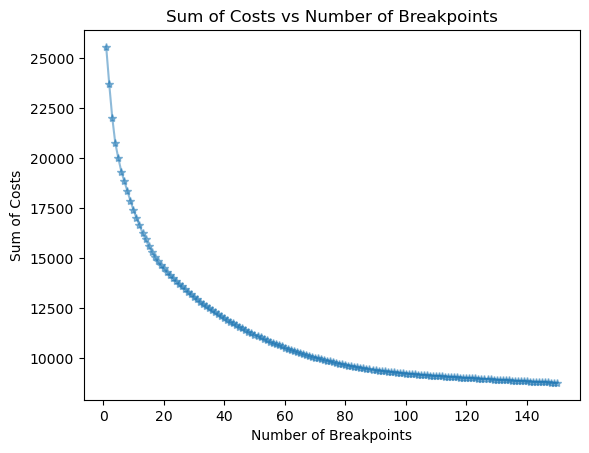

In [13]:
algo = rpt.Dynp(model="normal").fit(signal)
n_bkps_max=150
_ = algo.predict(n_bkps_max) # 一个高效语句

array_of_n_bkps = np.arange(1, n_bkps_max+1)

def get_sum_of_cost(algo, n_bkps) -> float:
    bkps = algo.predict(n_bkps=n_bkps)
    return algo.cost.sum_of_costs(bkps)

# Calculate the sum of cost for each number of breakpoints
sum_of_costs = [get_sum_of_cost(algo, n_bkps) for n_bkps in array_of_n_bkps]

# Plot the sum of costs
plt.plot(array_of_n_bkps, sum_of_costs,"-*",alpha=0.5)
plt.xlabel('Number of Breakpoints')
plt.ylabel('Sum of Costs')
plt.title('Sum of Costs vs Number of Breakpoints')
plt.show()

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

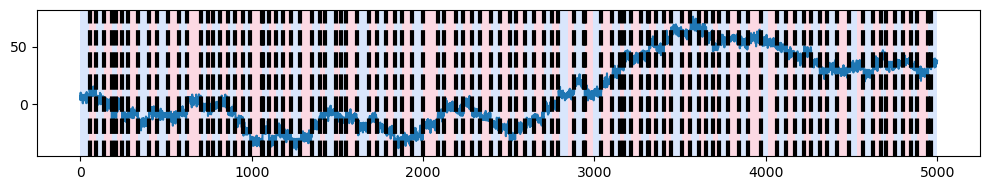

In [15]:
result = algo.predict(n_bkps=100)
rpt.display(signal, bkps, result)

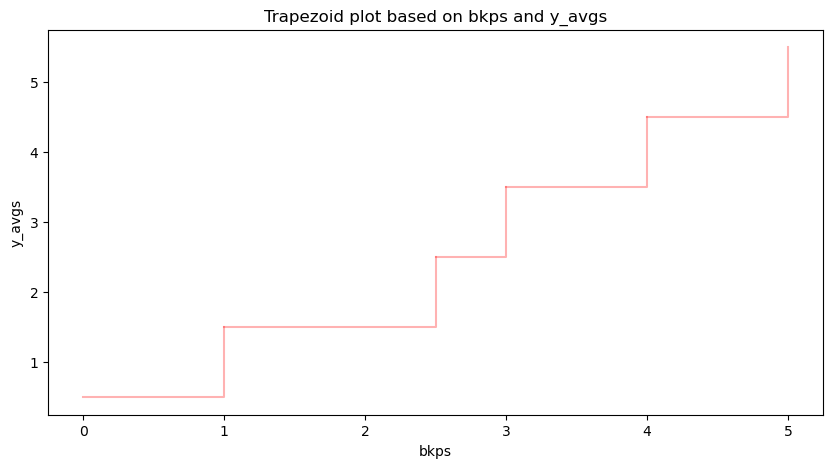

In [2]:
import matplotlib.pyplot as plt

# Assuming bkps and y_avgs are defined
bkps = [0, 1, 2.5, 3, 4, 5]
y_avgs = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

plt.figure(figsize=(10, 5))

# Draw trapezoids using step function
for i in range(len(bkps)-1):
    x = [bkps[i], bkps[i+1]]
    y = [y_avgs[i], y_avgs[i+1]]
    plt.step(x, y, color='r', alpha=0.3, where='post')

plt.title("Trapezoid plot based on bkps and y_avgs")
plt.ylabel("y_avgs")
plt.xlabel("bkps")
plt.show()